In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Oscilador local - prealocações
nIterations = 5e3
f0 = 1e3 # frequência nominal
fs = 1e6 # frequência de amostragem 
phi_local = 2*np.pi*np.arange(nIterations)*f0/fs # fase do oscilador local

In [3]:
#Oscilador local - sinal
s_local = np.exp(1j*phi_local)

c:\Users\Leoni Gabriel\radioconda\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


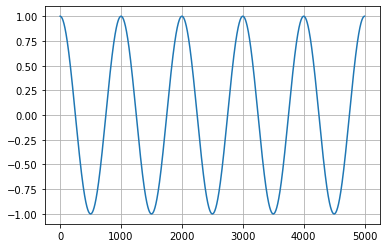

In [4]:
plt.plot(s_local)
plt.grid()
plt.show()

In [5]:
#Incremento em fase
delta_phi = 2*np.pi*f0/fs*0.1

In [6]:
delta_phi

0.0006283185307179586

In [7]:
#Sinais locais atrasados e adiantados
s_run =np.exp(1j*(phi_local - 1))
s_drag = np.exp(1j*(phi_local + 1))

c:\Users\Leoni Gabriel\radioconda\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\Leoni Gabriel\radioconda\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\Leoni Gabriel\radioconda\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


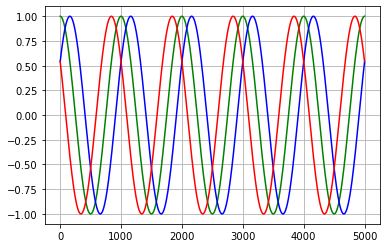

In [8]:
plt.plot(s_local,'g', label= 'local')
plt.plot(s_run,'b', label='avançado')
plt.plot(s_drag,'r', label= 'atrasado')
plt.grid()
plt.show()

In [9]:
#Sinal de entrada
delta_in = 0.5 #atraso intensional de fase para a entrada 
phi_in = 2*np.pi*np.arange(nIterations)*f0/fs
#s_in = np.exp(1j*(phi_in - delta_in)) #sinal de entrada

In [10]:
plt.plot(s_in,'b', label='entrada')
plt.plot(s_local,'r', label= 'local')
plt.grid()
plt.show()

NameError: name 's_in' is not defined

In [62]:
#pré-alocações
k                  = 5
Nsam               = 1000
phi_try            = np.zeros(int(Nsam), dtype=complex) # É a tentativa de acerto para a fase
tau_loop           = np.zeros(int(Nsam)) # Acumulador de fase, é a fase da saída
lom_mult           = np.zeros(int(Nsam),dtype=complex) # Recebe t=(|Xh*c(k-1)|^2-|Xh*c(k+1)|^2) -> local oscilator multiplier
tau                = np.zeros(k) # Acumulador de atraso, é a fase da saída
E = np.zeros(k) 
Natraso = np.ceil(0.1*Nsam)


In [63]:
nIterations = k*Nsam
delta_in = 2*np.pi*f0/fs*Natraso
phi_in = 2*np.pi*np.linspace(0,nIterations-1,nIterations)*f0/fs
s_in = np.exp(1j*(phi_in - delta_in)) #sinal de entrada

In [32]:
nIterations

5000

In [33]:
np.arange(nIterations)

array([   0,    1,    2, ..., 4997, 4998, 4999])

In [34]:
s_in

array([-1.        -5.66553890e-16j, -0.99998026-6.28314397e-03j,
       -0.99992104-1.25660399e-02j, ..., -0.99982235+1.88484397e-02j,
       -0.99992104+1.25660399e-02j, -0.99998026+6.28314397e-03j])

In [35]:
S  =  np.reshape(s_in,[k,Nsam])

In [36]:
print(S[0,:])

[-1.00000000e+00-5.66553890e-16j -9.99980261e-01-6.28314397e-03j
 -9.99921044e-01-1.25660399e-02j -9.99822352e-01-1.88484397e-02j
 -9.99684189e-01-2.51300954e-02j -9.99506560e-01-3.14107591e-02j
 -9.99289473e-01-3.76901827e-02j -9.99032935e-01-4.39681183e-02j
 -9.98736957e-01-5.02443182e-02j -9.98401550e-01-5.65185345e-02j
 -9.98026728e-01-6.27905195e-02j -9.97612506e-01-6.90600257e-02j
 -9.97158900e-01-7.53268055e-02j -9.96665928e-01-8.15906116e-02j
 -9.96133609e-01-8.78511966e-02j -9.95561965e-01-9.41083133e-02j
 -9.94951017e-01-1.00361715e-01j -9.94300790e-01-1.06611154e-01j
 -9.93611311e-01-1.12856385e-01j -9.92882605e-01-1.19097160e-01j
 -9.92114701e-01-1.25333234e-01j -9.91307631e-01-1.31564359e-01j
 -9.90461426e-01-1.37790291e-01j -9.89576119e-01-1.44010783e-01j
 -9.88651745e-01-1.50225589e-01j -9.87688341e-01-1.56434465e-01j
 -9.86685944e-01-1.62637165e-01j -9.85644595e-01-1.68833445e-01j
 -9.84564335e-01-1.75023059e-01j -9.83445205e-01-1.81205764e-01j
 -9.82287251e-01-1.873813

In [64]:
#Sinal de entrada "fatiado"
s_in_k = np.exp(1j*(2*np.pi*(np.arange(Nsam)+Natraso)*f0/fs)) # s_in com Nsam amostras
s_in_ref = np.exp(1j*2*np.pi*np.arange(Nsam)*f0/fs)

c:\Users\Leoni Gabriel\radioconda\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\Leoni Gabriel\radioconda\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


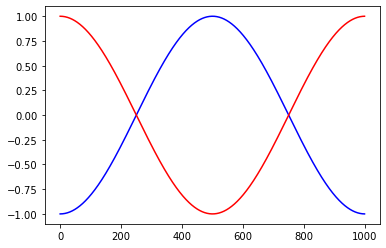

In [53]:
plt.plot(s_in_k, "b")
plt.plot(s_in_ref, "r")
plt.show()

In [54]:
#Inicialização de tau
tau.put(0,0)
phi = 2*np.pi*np.arange(Nsam)*f0/fs


In [65]:
yt = 1e-5
delta_phi = 2*np.pi*f0/fs

for ii in range(k-1):

    # sinais atrasado e adiantado 
    s_run =np.exp(1j*(phi-tau.item(ii)-delta_phi))
    s_drag = np.exp(1j*(phi-tau.item(ii)+delta_phi))

    #detector de fase
    x_r = np.inner(np.conjugate(S[ii]),s_run)/Nsam
    x_d = np.inner(np.conjugate(S[ii]),s_drag)/Nsam 

    E[ii] = (np.abs(x_r)**2 - np.abs(x_d)**2)
    #tau[ii+1] = tau[ii]+(yt/(2*delta_phi))*E[ii]

    tau[ii+1] = tau[ii]+(yt/(2*delta_phi))*E[ii]


    #tau_loop.put(ii, (yt/delta_phi)*(np.abs(x_r)**2 - np.abs(x_d)**2))


    # Atualizar o valor do tau de saída
    #tau.put(ii+1, tau.item(ii)+tau_loop.item(ii))




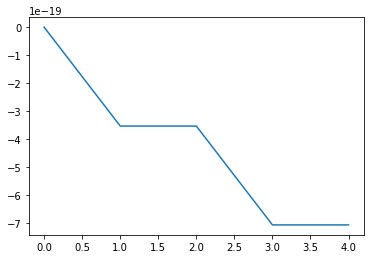

In [66]:
plt.plot(tau)

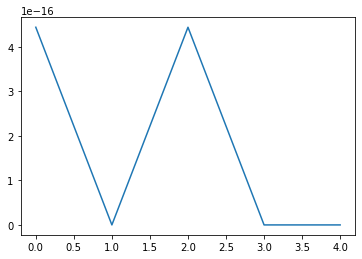

In [67]:
plt.plot(np.abs(E))

In [68]:
print(tau[-1])
print(Natraso*(1/fs))

-7.06789929214115e-19
9.999999999999999e-05


In [19]:
tau_loop

array([ 3.70561478e-10, -3.70561478e-10,  3.70561478e-10, -3.70561478e-10,
        3.70561478e-10, -3.70561478e-10,  3.70561478e-10, -3.70561478e-10,
        3.70561478e-10, -3.70561478e-10,  3.70561478e-10, -3.70561478e-10,
        3.70561478e-10, -3.70561478e-10,  3.70561478e-10, -3.70561478e-10,
        3.70561478e-10, -3.70561478e-10,  3.70561478e-10, -3.70561478e-10,
        3.70561478e-10, -3.70561478e-10,  3.70561478e-10, -3.70561478e-10,
        3.70561478e-10, -3.70561478e-10,  3.70561478e-10, -3.70561478e-10,
        3.70561478e-10, -3.70561478e-10,  3.70561478e-10, -3.70561478e-10,
        3.70561478e-10, -3.70561478e-10,  3.70561478e-10, -3.70561478e-10,
        3.70561478e-10, -3.70561478e-10,  3.70561478e-10, -3.70561478e-10,
        3.70561478e-10, -3.70561478e-10,  3.70561478e-10, -3.70561478e-10,
        3.70561478e-10, -3.70561478e-10,  3.70561478e-10, -3.70561478e-10,
        3.70561478e-10, -3.70561478e-10,  3.70561478e-10, -3.70561478e-10,
        3.70561478e-10, -

In [20]:
print(x_r)
print(np.abs(x_r))

(304.25557275256716+952.5904400365393j)
1000.0000000000002


In [21]:
print(x_d)
print(np.abs(x_d))

(280.22079690554705-959.935573349389j)
1000.0


In [ ]:
s_teste = np.exp(1j*(2*np.pi*np.arange(Nsam)*f0/fs+tau))
plt.plot(s_teste, "g")
plt.plot(s_in_k, "b")
plt.show()

: 

: 